In [1]:
import dash 
dash.__version__

'1.20.0'

In [2]:
import pandas as pd
import numpy as np

import math,datetime
import time

import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import model_selection
from sklearn.model_selection import train_test_split


In [3]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

In [4]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime

df=pd.read_csv('historical_data.csv')


In [5]:
corr_matrix = df.corr()
with open('corr.npy', 'wb') as f:
    np.save(f, corr_matrix)

In [6]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

# Multivariate

In [7]:
df=pd.read_csv('historical_data.csv')
forecast_Col = 'elec_price'
df['label'] = df[forecast_Col].shift(-7*24)
df_features = df[['elec_price','tempC','windspeedKmph','Brent_Prices','Henry_Hub_Price','WTI_Prices','label']]

df_features.dropna(inplace=True)
df_features.tail()

<ipython-input-7-e64a42fae7bf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features.dropna(inplace=True)


,elec_price,tempC,windspeedKmph,Brent_Prices,Henry_Hub_Price,WTI_Prices,label
26851,139.55,16,11,75.795584,3.305846,73.204890,99.97
26852,133.20,16,10,75.827389,3.303697,73.222023,98.97
26853,112.34,15,9,75.858733,3.302039,73.241101,97.02
26854,93.35,15,10,75.889616,3.300869,73.262123,96.01
26855,86.34,14,10,75.920039,3.300190,73.285090,84.36


In [8]:
n = len(df_features)
train_df = df_features[0:int(n/0.7)]
val_df = df_features[int(n*0.7):int(n*0.9)]
test_df = df_features[int(n*0.9):]



In [9]:
train_df

,elec_price,tempC,windspeedKmph,Brent_Prices,Henry_Hub_Price,WTI_Prices,label
0,42.34,20,5,74.540000,2.910000,65.810000,43.02
1,38.89,20,4,74.531092,2.909331,65.748064,43.24
2,38.82,20,3,74.521994,2.908674,65.687461,42.53
3,38.45,19,3,74.512704,2.908027,65.628193,42.09
4,38.62,20,5,74.503223,2.907392,65.570258,42.53
...,...,...,...,...,...,...,...
26851,139.55,16,11,75.795584,3.305846,73.204890,99.97
26852,133.20,16,10,75.827389,3.303697,73.222023,98.97
26853,112.34,15,9,75.858733,3.302039,73.241101,97.02
26854,93.35,15,10,75.889616,3.300869,73.262123,96.01


In [10]:
scaler1 = StandardScaler()

scaler1.fit(train_df.filter(['label']))
scaled_labels= pd.DataFrame(scaler1.transform(train_df.filter(['label'])), columns=[ 'label'])
scaled_labels

,label
0,0.101546
1,0.112652
2,0.076809
3,0.054597
4,0.076809
...,...
26851,2.976550
26852,2.926067
26853,2.827625
26854,2.776638


In [11]:

scaler = StandardScaler()

scaler.fit(train_df)


scaled_train_df = pd.DataFrame(scaler.transform(train_df), 
                               columns=['elec_price', 'tempC', 'windspeedKmph', 'Brent_Prices', 'Henry_Hub_Price', 'WTI_Prices', 'label'])
scaled_val_df = pd.DataFrame(scaler.transform(val_df),
                               columns=['elec_price', 'tempC', 'windspeedKmph', 'Brent_Prices', 'Henry_Hub_Price', 'WTI_Prices', 'label'])
scaled_test_df = pd.DataFrame(scaler.transform(test_df),
                               columns=['elec_price', 'tempC', 'windspeedKmph', 'Brent_Prices', 'Henry_Hub_Price', 'WTI_Prices', 'label'])


train_X = scaled_train_df.drop(['label'], axis=1)
val_X = scaled_val_df.drop(['label'], axis=1)
test_X = scaled_test_df.drop(['label'], axis=1)

#display(train_X)
train_y = scaled_train_df['label']
val_y = scaled_val_df['label']
test_y = scaled_test_df['label']


In [58]:

train_X = np.asarray(train_X)
val_X = np.asarray(val_X)

test_X = np.asarray(test_X)
train_y = np.asarray(train_y)
val_y = np.asarray(val_y)
test_y = np.asarray(test_y)
print(test_y)
print(len(val_X))
print(len(test_X))


[-1.82134948 -1.82791226 -1.83144606 ...  2.82762529  2.77663751
  2.18851116]
5371
2686


In [13]:
# convert data to sequences of data for LSTM

X_train = []
y_train = []
X_val = []
y_val = []
X_test = []
y_test = []

seq_len = 24*7
predict_future=24

for i in range(seq_len, len(train_X)-predict_future):
    X_train.append(train_X[i-seq_len:i])
    y_train.append(train_y[i:i+predict_future])
X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train.shape, y_train.shape)

for i in range(seq_len,len(val_X) - predict_future):
    X_val.append(val_X[i-seq_len:i])
    y_val.append(val_y[i:i+predict_future])
X_val, y_val = np.array(X_val), np.array(y_val)

#print(X_val.shape, y_val.shape)


for i in range(seq_len,len(test_X) - predict_future):
    X_test.append(test_X[i-seq_len:i])
    y_test.append(test_y[i:i+predict_future])
X_test, y_test = np.array(X_test), np.array(y_test)



(26831, 24, 6) (26831, 1)


In [14]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 51% accuracy on test set
# model = tf.keras.models.Sequential([
#     tf.keras.layers.LSTM(64, return_sequences=True),#, activation=tf.nn.sigmoid),
#     tf.keras.layers.Dropout(.25),
    
#     tf.keras.layers.LSTM(32, return_sequences=True),# activation=tf.nn.relu),
#     tf.keras.layers.Dropout(.25),
    
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(16, activation=tf.nn.relu),
#     tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
# ])

# 55% accuracy on val set, 54% accuracy on test set
model = Sequential()

model.add(LSTM(68, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.15))
model.add(LSTM(50, return_sequences= False))
model.add(Dropout(0.3))
model.add(Dense(25))
model.add(Dense(1))

# 54% accuracy on val set, 56% accuracy on test set (pred 1 9x)
# model = tf.keras.models.Sequential([
#     tf.keras.layers.LSTM(5, return_sequences=False),
#     tf.keras.layers.Dropout(.4),
    
#     tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
# ])


model.compile(optimizer='adam',loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

# early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 9, restore_best_weights = False)

# model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(), metrics=['mse'])
# model.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics=['mse'])

# history = model.fit(X_train, y_train, verbose=1, epochs=20, batch_size=50, validation_data=(X_val, y_val), callbacks = [early_stopping])

Epoch 1/10
839/839 [==============================] - 104s 120ms/step - loss: 0.5859
Epoch 2/10
839/839 [==============================] - 110s 131ms/step - loss: 0.4676
Epoch 3/10
839/839 [==============================] - 118s 140ms/step - loss: 0.4212
Epoch 4/10
839/839 [==============================] - 150s 178ms/step - loss: 0.3789
Epoch 5/10
839/839 [==============================] - 188s 224ms/step - loss: 0.3524
Epoch 6/10
839/839 [==============================] - 169s 201ms/step - loss: 0.3254
Epoch 7/10
839/839 [==============================] - 163s 194ms/step - loss: 0.3014
Epoch 8/10
839/839 [==============================] - 194s 232ms/step - loss: 0.2848
Epoch 9/10
839/839 [==============================] - 171s 204ms/step - loss: 0.2577
Epoch 10/10
839/839 [==============================] - 157s 187ms/step - loss: 0.2372


In [ ]:
X_train
y_train

In [51]:
# model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 24, 68)            20400     
_________________________________________________________________
dropout (Dropout)            (None, 24, 68)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                23800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 24)                624       
Total params: 46,099
Trainable params: 46,099
Non-trainable params: 0
____________________________________________________

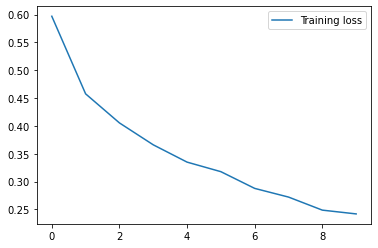

In [52]:
# history = model.fit(X, y, epochs=30, batch_size=48, validation_split=0.3, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
# plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [16]:
model.save("multi_model_1hour.h5")
import pickle
scalerfile = 'scalerhour_multi.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [29]:
import math
from sklearn.metrics import accuracy_score, mean_squared_error

# function for displaying model evaluation scores
def eval_metrics(y_actual, y_predict, dataset):
    print("\nEvaluation metrics for " + dataset + ":\n")
    print("Accuracy score is: %.2f" % accuracy_score(y_actual, y_predict))
    print("Mean Squared Error: %.3f" % mean_squared_error(y_actual, y_predict))
    print("Root Mean Squared Error: %.3f" % math.sqrt(mean_squared_error(y_actual, y_predict)))
    print("-----------------------------------------")
    

In [18]:
y_test=scaler1.inverse_transform(y_test)

In [41]:
# from tensorflow.keras.models import load_model
# import pickle
# model = load_model('multi_model_1hour.h5')
# scalerfile = 'scalerhour_hour.sav'
# # scalerimported = pickle.load(open(scalerfile, 'rb'))
# # predictions_uni = model.predict(X_test[:,:,0])

# # predictions_uni = scalerimported.inverse_transform(predictions_uni)
# model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 24, 68)            20400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 68)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                23800     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 45,501
Trainable params: 45,501
Non-trainable params: 0
__________________________________________________

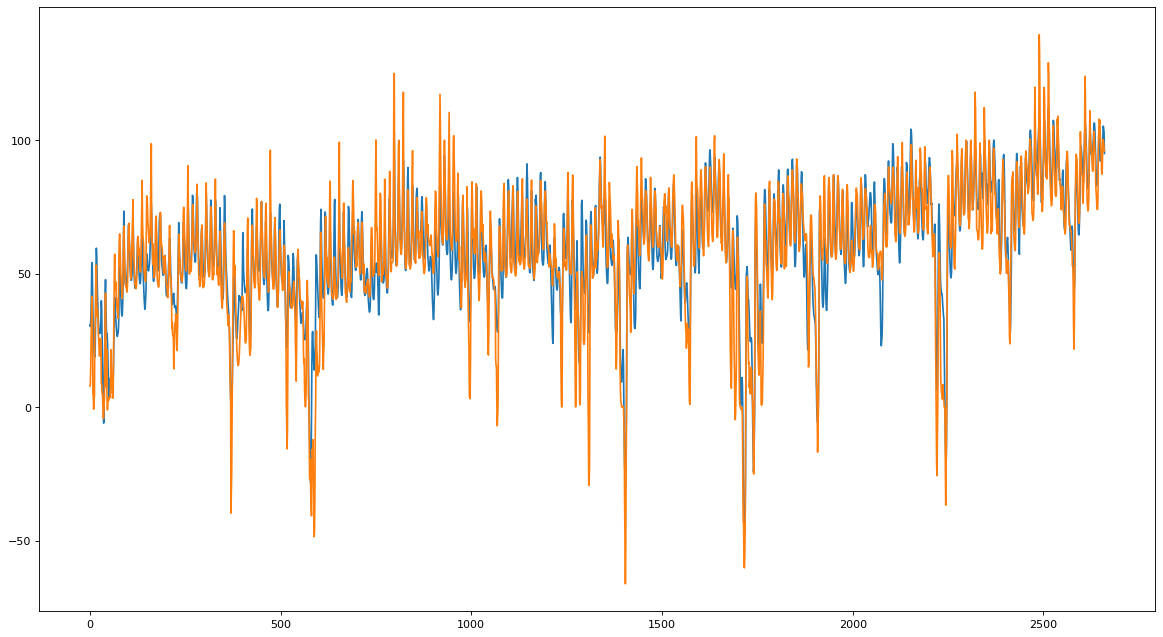

NameError: name 'max_dict' is not defined

In [19]:
# scaler.inverse_transform()

import matplotlib.pyplot as plt

predictions = model.predict(X_test)

predictions = scaler1.inverse_transform(predictions)

# max_dict = {key: max(results[key]) for key in results.keys()}

plt.figure(figsize=(18,10), dpi=80)
plt.plot(range(len(predictions)), predictions)
plt.plot(range(len(y_test[:,0])) , y_test[:,0] )
plt.show()
plt.plot(*zip(*max_dict.items()))
plt.xlabel("time range")
plt.ylabel("most increase factor")
plt.show
plt.savefig("stocknet_analysis")



In [71]:
y_test[:,]

array([[ 7.93],
       [ 7.92],
       [13.44],
       ...,
       [98.97],
       [97.02],
       [96.01]])

In [62]:
predictions.shape

(2661, 24)

In [20]:
from sklearn.metrics import accuracy_score, mean_squared_error
print("Mean Squared Error: %.3f" % mean_squared_error(y_test[:,0], predictions[:,:]))


Mean Squared Error: 125.696


In [ ]:
X_train.shape